<a href="https://colab.research.google.com/github/yashgokhale/Data-Analysis-ML-of-Cloud-Data/blob/master/NN_LWC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Master_File_LWC.csv')
data=data.drop(columns=['Unnamed: 0'])

In [26]:
#!pip install tensorflow==2.3.0
#!pip install --upgrade tensorflow

In [27]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
y=np.reshape(y,(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=19)
batch_size =len(X_train)
print(X_train.shape, y_train.shape,y_test.shape )

(1344802, 5) (1344802, 1) (336201, 1)


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Train
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# test
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
# Train
y_train_scaled = scaler.fit_transform(y_train.astype(np.float64))
# test
y_test_scaled = scaler.fit_transform(y_test.astype(np.float64))

In [29]:
FEATURES=list(data.columns[:-1])
OUTPUT=['LWC']

In [39]:
from sklearn.preprocessing import MinMaxScaler
X_train_d=pd.DataFrame(X_train_scaled,columns=FEATURES)
X_test_d=pd.DataFrame(X_test_scaled,columns=FEATURES)
y_train_d=pd.DataFrame(y_train_scaled,columns=OUTPUT)['LWC']
y_test_d=pd.DataFrame(y_test_scaled,columns=OUTPUT)['LWC']

In [40]:
import tensorflow as tf
feature_col=[tf.feature_column.numeric_column(x) for x in FEATURES]
#feature_col=feature_col+[tf.feature_column.numeric_column('LWC')]

In [41]:
opti = tf.optimizers.Adam(learning_rate = 0.01)
input_func= tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train_d, 
                                                y= y_train_d, 
                                                batch_size=10, 
                                                num_epochs=1000, 
                                                shuffle=True)

In [42]:
test_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x= X_test_d,                                                   
                                                 batch_size=100, 
                                                 num_epochs=1, 
                                                 shuffle=False)
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test_d,
                                                      y=y_test_d, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                      shuffle=False)

In [43]:
estimator = tf.estimator.DNNRegressor(hidden_units=[9,9,3], feature_columns=feature_col, optimizer=opti, dropout=0.5)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpd0bipo_h', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [44]:
estimator.train(input_fn=input_func,steps=20000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpd0bipo_h/model.ckpt.
INFO:tensorflow:Calling checkpoint lis

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-13T02:32:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpd0bipo_h/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 60.02680s
INFO:tensorflow:Finished evaluation at 2020-10-13-02:33:51
INFO:tensorflow:Saving dict for global step 20000: average_loss = 0.004527938

Text(0, 0.5, 'predicted values')

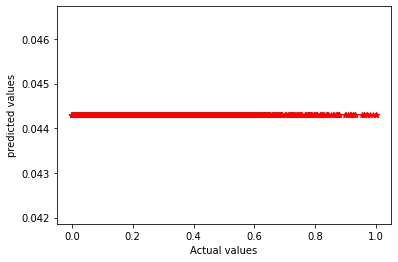

In [47]:
result_eval = estimator.evaluate(input_fn=eval_input_func)
predictions=[]
for pred in estimator.predict(input_fn=test_input_func):
    predictions.append(np.array(pred['predictions']).astype(float))
plt.plot(y_test_d, predictions, 'r*')
plt.xlabel('Actual values')
plt.ylabel('predicted values')